# Welcome to the Grape Number Crunch!
## Franzia Tier

<img src = "images/catalina_wine_mixer.gif" style="width: 600px;">

# Table of Contents

* [Contest Overview](#Contest-Overview)
* [Classification Overview](#Classification-Overview)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Classification Metrics](#Classification-Metrics)
* [Classification Techniques](#Classification-Techniques)
  * [Logistic Regression](#Logistic-Regression)
  * [Penalized Logistic Regression](#Penalized-Logistic-Regression)
  * [Linear Discriminant Analysis](#Linear-Discriminant-Analysis)
* [Recap](#Recap)
* [Next Steps](#Next-Steps)
* [Make Predictions](#Make-Predictions)

# Contest Overview

We are very excited to host the very first Grape Number Crunch with WACC! We think this contest will be a lot of fun and is (probably) the nerdiest possible way to enjoy wine.

The premise of the contest is simple, you can team up with up to 3 other Darden students to build a model that predicts whether a given wine is a white or a red:

<img src = "images/this_is_a_white.gif">

**The top 4 FYs and top 4 SYs with the best models will win gift cards to one of Charlottesville's top vineyards, Pippin Hill**.

<img src = "images/trippin_hill.jpg" style="width: 600px;">

# Classification Overview

Classification in machine learning is simply trying to predict a class label given some input data. Common examples include predicting whether or not a customer will churn next period, predicting if an email is spam or ham, or, in our case, if a wine is white or red. You could also have multiple classes, like where you can try to use image data of handwritten digits to determine which digit from 0-9 someone wrote (so 10 classes in total), or if you wanted to classify red wines vs. white wines vs. rosés (3 classes).

Below we'll walk through some python code that will allow you to build your very own classification model! 

If you need some refreshers on coding in python, the Data Science Club highly recommends [DataCamp](datacamp.com) (free to all DSC members) or Coursera for some of their python tutorials. The DSC has also recently published some detailed descriptions in the [Bachelor Forecasting Challenge](https://github.com/DardenDSC/bachelor-forecasting-challenge/blob/master/Bachelor%20Starter%20Code.ipynb) that aims to provide some more background on ML, python, and general stats knowledge.

Without further ado, let's channel our inner sommelier and start classifying wines!

# Exploratory Data Analysis

## Load necessary packages

In [ ]:
!pip install seaborn --upgrade #Upgrade the seaborn package to the latest version

In [1]:
#Manipulate data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#Build data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#For model training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#For model assessment
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, auc, roc_curve, plot_roc_curve

# Set number of CPU cores for parallel algorithms (code written by Prof. Albert)
import os
if "CPU_LIMIT" in os.environ:
    # If you are on JupyterHub, this gives you the right number of CPUs for your virtual machine
    num_cpus = int(os.getenv("CPU_LIMIT").split('.')[0])
else:
    # If you are not on JupyterHub, this gives you the right number for your computer.
    num_cpus = os.cpu_count()

In [3]:
print(sns.__version__)

0.11.0


## Load in our data

In [4]:
#Read in our data from a csv file
df = pd.read_csv('train_data.csv')

In [5]:
#Show the first 10 rows in our dataframe
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.7,0.64,0.30,1.2,0.030,18.0,76.0,0.98920,3.16,0.60,12.9,4,white
1,6.1,0.60,0.00,1.3,0.042,24.0,79.0,0.99370,3.31,0.38,9.4,4,white
2,9.4,0.17,0.55,1.6,0.049,14.0,94.0,0.99490,3.02,0.61,10.3,6,white
3,6.6,0.32,0.22,16.7,0.046,38.0,133.0,0.99790,3.22,0.67,10.4,6,white
4,9.1,0.28,0.49,2.0,0.059,10.0,112.0,0.99580,3.15,0.46,10.1,5,white
5,6.8,0.30,0.23,4.6,0.061,50.5,238.5,0.99580,3.32,0.60,9.5,5,white
6,6.4,0.14,0.31,1.2,0.034,53.0,138.0,0.99084,3.38,0.35,11.5,7,white
7,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,7,red
8,6.9,0.28,0.33,1.2,0.039,16.0,98.0,0.99040,3.07,0.39,11.7,6,white
9,5.7,0.33,0.15,1.9,0.050,20.0,93.0,0.99340,3.38,0.62,9.9,5,white


So it looks like we have 13 columns in our dataset. The first 12 are numeric and the last is categorical.

In [6]:
df.shape

(3249, 13)

We have a little over 3000 different wines in our dataset

Let's create a variable for our classification problem, where we say that white wines have a value of 1 and red wines have a value of 0.

In [7]:
df['white?'] = (df['color'] == 'white').astype(int)

In [8]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,white?
0,6.7,0.64,0.30,1.2,0.030,18.0,76.0,0.98920,3.16,0.60,12.9,4,white,1
1,6.1,0.60,0.00,1.3,0.042,24.0,79.0,0.99370,3.31,0.38,9.4,4,white,1
2,9.4,0.17,0.55,1.6,0.049,14.0,94.0,0.99490,3.02,0.61,10.3,6,white,1
3,6.6,0.32,0.22,16.7,0.046,38.0,133.0,0.99790,3.22,0.67,10.4,6,white,1
4,9.1,0.28,0.49,2.0,0.059,10.0,112.0,0.99580,3.15,0.46,10.1,5,white,1
5,6.8,0.30,0.23,4.6,0.061,50.5,238.5,0.99580,3.32,0.60,9.5,5,white,1
6,6.4,0.14,0.31,1.2,0.034,53.0,138.0,0.99084,3.38,0.35,11.5,7,white,1
7,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,7,red,0
8,6.9,0.28,0.33,1.2,0.039,16.0,98.0,0.99040,3.07,0.39,11.7,6,white,1
9,5.7,0.33,0.15,1.9,0.050,20.0,93.0,0.99340,3.38,0.62,9.9,5,white,1


Let's get a summary of our data using a function that will give us a bunch of summary statistics:

In [9]:
#Define the function 
#Function originally written by Prof. Michael Albert
def summarize_dataframe(df):
    """Summarize a dataframe, and report missing values."""
    missing_values = pd.DataFrame({'Variable Name': df.columns,
                                   'Data Type': df.dtypes,
                                   'Missing Values': df.isnull().sum(),
                                   'Unique Values': [df[name].nunique() for name in df.columns]}
                                 ).set_index('Variable Name')
    with pd.option_context("display.max_rows", 1000):
        display(pd.concat([missing_values, df.describe(include='all').transpose()], axis=1).fillna(""))

In [10]:
summarize_dataframe(df)

,Data Type,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Variable Name,,,,,,,,,,,,,,
fixed acidity,float64,0,98,3249.0,,,,7.20539,1.27706,3.8,6.4,7,7.7,15.9
volatile acidity,float64,0,162,3249.0,,,,0.339141,0.164569,0.08,0.23,0.29,0.4,1.33
citric acid,float64,0,84,3249.0,,,,0.318818,0.145791,0,0.24,0.31,0.39,1
residual sugar,float64,0,271,3249.0,,,,5.48413,4.82573,0.6,1.8,3.1,8.2,65.8
chlorides,float64,0,170,3249.0,,,,0.0552844,0.0325112,0.009,0.038,0.047,0.065,0.467
free sulfur dioxide,float64,0,111,3249.0,,,,30.5425,17.1496,1,17,29,41,146.5
total sulfur dioxide,float64,0,256,3249.0,,,,116.773,55.5059,6,81,119,156,313
density,float64,0,815,3249.0,,,,0.994702,0.00304079,0.98713,0.9924,0.99489,0.99699,1.03898
pH,float64,0,100,3249.0,,,,3.22002,0.160813,2.72,3.11,3.21,3.32,4.01


Some highlights:
 * About 75% of the training set is of white wines, with the remaining being reds
 * Residual sugar has a lot of variation, and it's mean appears far different than it's median, indicating skew in the data
 * Median quality of the wines is a 6, while the max is a 9

## Data Visualization

Let's now try to visualize our data. We'll start by looking at the distributions of each column in our dataset

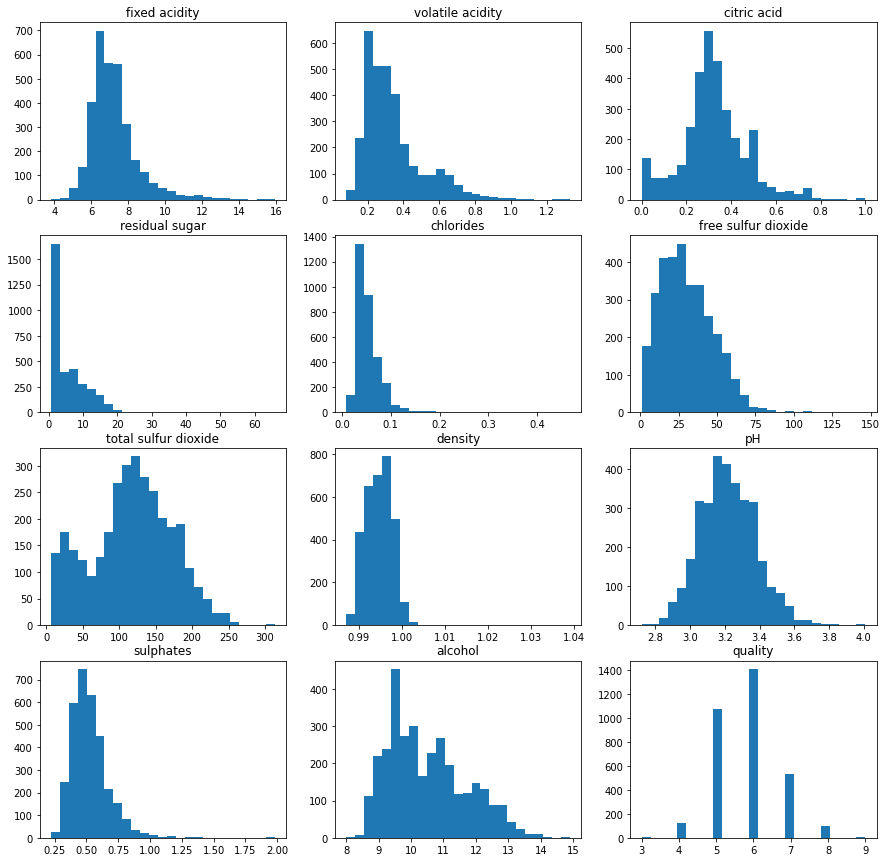

In [11]:
fig, axs = plt.subplots(4, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

k = 0

for i in range(0,4):
    for j in range(0,3):
        col = df.columns[k]
        axs[i,j].hist(df[col], bins = 25)
        axs[i,j].set_title(col)
        k = k+1     

We can break these histograms down further by looking at the distributions of red and white wines separately for each column:

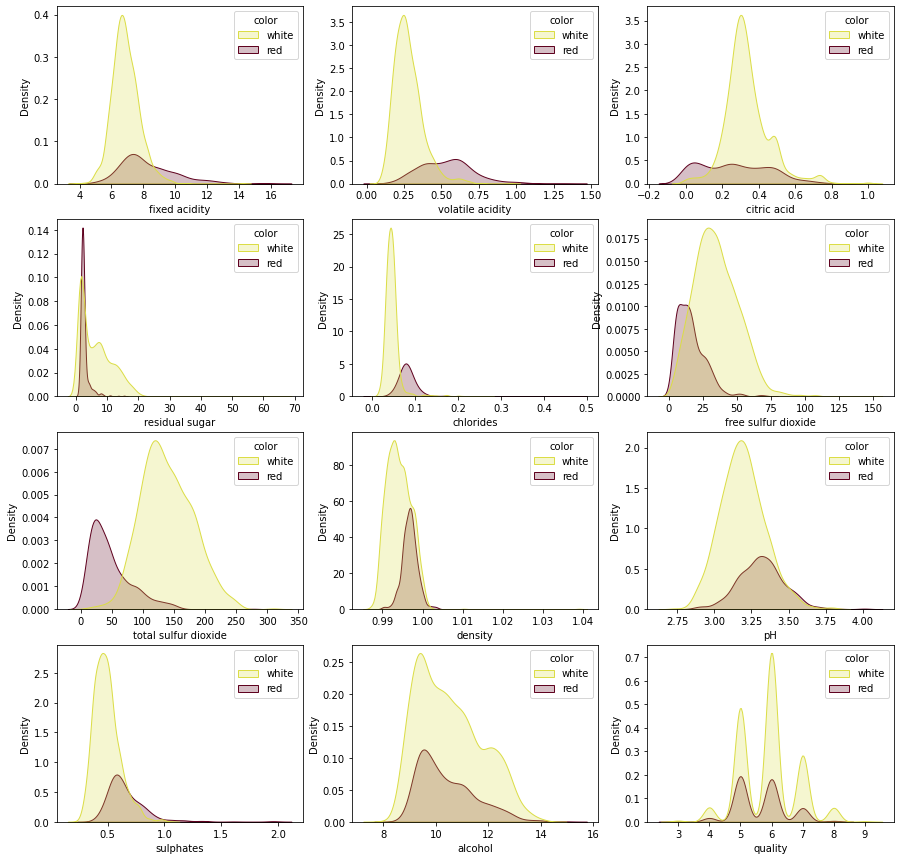

In [12]:
wine_colors = ['#dbdd46','#5F021F']
sns.set_palette(sns.color_palette(wine_colors))

fig, axs = plt.subplots(4, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

k = 0

for i in range(0,4):
    for j in range(0,3):
        col = df.columns[k]
        sns.kdeplot(df[col], hue = df['color'], shade = True, ax = axs[i,j])
        k = k+1     

Looks like many of these columns follow normal or [exponential distributions](https://en.wikipedia.org/wiki/Exponential_distribution).

The distributions of residual sugar and free sulfur dioxide between red and white wines appear to be very different. These could be a good features to include in our classification model!

Let's now look at the relationships between variables with a correlation plot:

In [ ]:
corr = df.corr()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

Looking at the bottom row, we can see which variables are storngly correlated with white wines vs. reds.

* Positive correlation with white (have a red-shaded cell):
  * Citric acid
  * Residual sugar
  * Sulfur dioxide
* Negative correlation with white (have a blue-shaded cell):
  * Acidity
  * Chlorides
  * Density
  * pH
  * Sulfates
  
There are also some strong relationships between predictor variables, indicated by the magnitude of the correlation coefficient:
 * Alcohol and quality (go figure)
 * Alcohol and density
 * Density and residual sugar
 * Density and fixed acidity
 * Free and total sulfur dioxide
 * Volatile acidity and citric acid

We can look at the relationships and distrubtions between multiple variables using a 2D kernel density plot! Each axis represents a distribution of a variable, and the contours represent the shape of a distribution. You can think of these like the contour maps you see plotting elevation vs. longitude and latitude. The peaks of the mountain tops on a map like that are analogous to the peak (or mode) of a distribution of data.

<img src = 'images/contour_plot.png'>

Basically, we are comparing two distributions of data (white wines and red wines) on 2 axes instead of 1.

In [ ]:
sns.kdeplot(x = df['alcohol'], y= df['density'], hue = df['color'], color =  wine_colors)

Red wines have slightly higher density for the given level of alcohol than white wines.

In [ ]:
sns.kdeplot(x = df['density'], y= df['residual sugar'], hue = df['color'])

White wines have much more variability with residual sugars than reds, and these tend to lead to higher density levels in white wines while having very little effect on red wines.

In [ ]:
sns.kdeplot(x = df['density'], y= df['fixed acidity'], hue = df['color'])

Red wines have much more variability in fixed acidity, while white wines have more variability in density.

In [ ]:
sns.kdeplot(x = df['free sulfur dioxide'], y= df['total sulfur dioxide'], hue = df['color'])

Free sulfur dioxide and total sulfur dioxide are highly correlated in both kinds of wine, and white wines typically have higher sulfur dioxide levels than red wines.

In [ ]:
sns.kdeplot(x = df['volatile acidity'], y= df['citric acid'], hue = df['color'])

Red wines tend to have higher volatile acidity than white wines, but both seem to have similar levels of citric acid.

## Split data into training and validation sets

Now we need to split our dataset in to a training set and a validation set. In this case, we are using 80% of the rows of our training data to fit our model and using the remaining 20% to validation our results. 

You might be wondering why we dont use all of our training data to fit our model. The reason is that we want to avoid **overfitting** our model to our training data. When we overfit our model to our training data, our model tends to perform poorly on new, unseen data because our model will effectively be memorizing our training data.

There's an inherent tradeoff in splitting our data between our training set and our validation set. By giving our model more data in the training set, we will be able to come up with better model parameters for our model. But leaving more data for the validation set will allow us to more accurately estimate the model's performance on unseen data. Hence there's a natural tradeoff between estimating model parameters (e.g. regression coefficients) and estimating our model's performance (e.g. model accuracy on unseen data). We want to find the right balance between estimating model parameters and estimating model performance.

A typical rule of thumb is to reserve 20% of your data for your validation set. Depending on your data, you might find that you need more rows in your validation set (especially if your overall dataset doesn't have many rows).

In [ ]:
#Data was already shuffled before it was loaded, but typically you want to have shuffle = True
#I used shuffle = False here to make merging datasets easier later in the code

train_df, validation_df = train_test_split(df, test_size = 0.2, random_state = 37, shuffle = False)

In [ ]:
#Define the features we want to use in our model
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

**TL;DR: Split your training data into a training set and validation set to accurately estimate model parameters (training) as well as model performance (validation).**

## Standardize our Continuous Variables

Our next step is to **standardize** our data across different columns. This will allow our different features to have a similar range of values, which will help us with some of the models we'll be working with.

For example, notice how the range of values between `Fixed Acidity` and `Volatile Acidity` are very different:

In [ ]:
print("Range of values for Fixed Acidity: " + str(train_df['fixed acidity'].max() - train_df['fixed acidity'].min()))
print("Range of values for Volatile Acidity: " + str(train_df['volatile acidity'].max() - train_df['volatile acidity'].min()))

Notice that the range of values for Fixed Acidity are an order of magnitude higher than Volatile Acidity. We want our different columns to have similar ranges of values so we can apply **regularization** techniques to these columns. We can do this by calculating the mean and the standard deviation of each column, and performing the following calculation on on our data. 

standardized value $ = \frac{x - \mu}{\sigma} $

where:
 - $x$ is a data point in a given column
 - $\mu$ is the column's mean value
 - $\sigma$ is the column's standard deviation

This will ensure that the data between columns will have similar ranges of values.

What is regularization and why does it matter to us? Regularization is simply a way of preventing overfitting in our model by penalizing our model for *unnecessary complexity*. You can think of regularization like [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor), where we want the simplest possible explanation to our problem but cutting out all the noise. 

Below we are going to scale all of our continuous data, as listed in `continuous_cols`.

In [ ]:
continuous_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

In [ ]:
non_continuous_cols = ['quality', 'color', 'white?']

In [ ]:
scaler = StandardScaler()

In [ ]:
#This will calculating the column means and standard deviations for all the data in our training dataset.
scaler.fit(train_df[continuous_cols])

In [ ]:
#This will scale the data in our training dataset (subtract the mean and divide by the standard deviation)
scaled_continuous_train_df = pd.DataFrame(scaler.transform(train_df[continuous_cols]), columns = continuous_cols)

In [ ]:
#Now we merge our scaled data back with on non-continuous data into one dataframe using the merge function
scaled_train_df = pd.merge(scaled_continuous_train_df, train_df[non_continuous_cols], left_index = True, right_index = True)
scaled_train_df

In [ ]:
#We repeat this process for our validation set
scaled_continuous_validation_df = pd.DataFrame(scaler.transform(validation_df[continuous_cols]), columns = continuous_cols)

In [ ]:
scaled_continuous_validation_df

In [ ]:
#Now we merge our scaled data back with on non-continuous data into one dataframe using the merge function
scaled_validation_df = pd.merge(scaled_continuous_validation_df, validation_df[non_continuous_cols].reset_index(), left_index = True, right_index = True)
scaled_validation_df

Now that we've scaled our training and validation data, we can see that the ranges of our columns are more or less equivalent:

In [ ]:
print("Range of values for Fixed Acidity: " + str(scaled_train_df['fixed acidity'].max() - scaled_train_df['fixed acidity'].min()))
print("Range of values for Volatile Acidity: " + str(scaled_train_df['volatile acidity'].max() - scaled_train_df['volatile acidity'].min()))

We'll now split our scaled data into our features / input variables (denoted by X) and our response / output variable (denoted by y).

In [ ]:
X_train = scaled_train_df[features]
y_train = scaled_train_df['white?']

In [ ]:
X_validation = scaled_validation_df[features]
y_validation = scaled_validation_df['white?']

**TL;DR: Standardizing your data can help with some regularization techniques**

# Classification Metrics

Now that we have our data transformed into a format to start building models, we need to start thinking about how we should assess the performance of our models. 

With classification problems like this, there are a number of metrics we can use to assess model performance. We'll start with some classic metrics that come from the aptly named **Confusion Matrix**:

<img src = 'images/confusionMatrix.png'>

Image Source: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

The confusion matrix is a 2x2 framework (MBB consultants please contain your excitement) for assessing the types of errors that occur in classification problems. On the x-axis you have the actual values of the thing you are trying to classify (is the wine red or white in reality?) and on the y-axis you have your model's predictions (is the wine red or white according to our model's predictions?). You also have the notion of *positive* and *negative* which depends on how your dataset is defined. In our example, a positive (or a value of 1) means that the wine is white, and a negative means the wine is red. It's important to make sure you understand what a positive value versus a negative value is in your data when doing these kinds of classification problems so you can correctly interpret the results!

Next we have **true positives** and **false positives**. A true positive (AKA **TP**) is when your model predicts the wine as being white (positive) and the wine in reality is actually white. A false positive (AKA **FP**) is when your model predicts the wine as being white (positive) when in reality the wine is red (negative). 

Conversely, we have **true negatives** and **false negatives**. A true negative (AKA **TN**) is when your model predicts the wine as a red (negative) and the wine is actually red in reality (negative). A false negative (AKA **FN**) is when your model predicts the wine as red (negative) when in reality the wine is white (positive).

This is intuitive image that shows the differences between TPs, FPs, TNs, and FNs, where a positive value indicates the person is pregnant:

<img src = 'images/confusionMatrix2.png'>

Image source: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

Given these definitions, we can start to define some metrics to assess model accuracy. 3 of the most common metrics that come from the confusion matrix are **accuracy**, **precision**, and **recall**.

Accuracy is simply measure of the proportion of objects you classified correctly (TPs and TNs) over all objects in your dataset. In other words, accuracy means "what percentage of objects did your model classify correctly?"

Precision measures the proportion of objects your model correctly classified as positive (TPs) over the total number of objects your model classified as positive (TPs and FPs). In other words, precision means "what percentage of your model's predictions that are positive are actually positive?" Precision is a great metric to use when the cost of making a false positive is relatively high, like with email spam classification. Assuming that a positive classification indicates that the email is spam, a false positive would mean that our spam detector would think that the email is spam when in reality it is "ham", or something we would want to read. Thus, having high precision would be very important to us in this kind of classification problem.

Recall measures the proporition of objects your model correctly classifies as positive (TPs) over the total number of objects that are actually positive (TPs and FNs). In other words, recall means "what proportion of positive values (i.e. white wines) did my model correctly classify?" Recall is a great metric when the cost of a false negative is really high. For example, think of medical diagnosis tests like detecting cancer in patients. We would want a model with high recall, one that catches as many patients with cancer as possible so they could get treatment. A false negative would mean that person would be left untreated, so we would want to minimize that value as much as possible.

Here's another good visualization depicting the differences between precision and recall:

<img src = 'images/precision_recall.png'>

Image source: https://towardsdatascience.com/whats-the-deal-with-accuracy-precision-recall-and-f1-f5d8b4db1021

Let's start using these three metrics in our upcoming models!

We'll start by generating a baseline to compare our future models against. Since about 75% of our training data is white wine and the rest of reds, a naive classifier would simply always predict that a wine is white since this would guarantee about 75% accuracy:

In [ ]:
naive_class_forecast = np.repeat(1, validation_df.shape[0])

In [ ]:
accuracy_score(y_true = y_validation, y_pred = naive_class_forecast)

In [ ]:
precision_score(y_true = y_validation, y_pred = naive_class_forecast)

In [ ]:
recall_score(y_true = y_validation, y_pred = naive_class_forecast)

F1 score is a combination of precision and recall according to the following formula:

$ F_1 = 2 \frac{precision \times recall}{precision + recall}$

F1 is a harmonic mean of precision and recall, which will balance the two scores together. F1 is often favored over accuracy when the costs of False Positives and False Negatives are both very high and/or when there is an imbalance in the classes we are trying to classify (e.g. our training set is mostly white wines).

In [ ]:
f1_score(y_true = y_validation, y_pred = naive_class_forecast)

Let's talk about one more metric for classification methods: **log-loss**. To understand this metric, we should now switch our thinking about what exactly our models will be predicting. Before, with the confusion matrix paradigm, our models were making **hard classifications**: predicting a given wine is 100% a white or this wine is 100% a red. Our models can also make predictions on the *probability* that a wine is white. More certain classifications that a wine is white [or red] will be very close to 1 [or 0], while uncertain classificaitons that a wine is white [or red] will be close to 0.5. 

Log-loss is a metric that's very useful in classification problems when we are predicting probabilities rather than hard classifications. While the background on log-loss is more complicated and outside the scope of this notebook, *our goal is to minimize a model's log-loss*.

#### Math (feel free to skip)

$log loss = -\frac{1}{N} \sum_{i=1}^{N} y_i log(\hat{y_i}) + (1- y_i) log(1 - \hat{y_i} ) $

where:
 - $y_i$ is the actual value (1 = white, 0 = red)
 - $\hat{y_i}$ is the predicted probabilty from your model (between 0 and 1)
 
Note that when your model makes a confident prediction that is true (model predicts 0.99 white and the wine is white), that log-loss is very small for that prediction:

$ -[\boldsymbol{1 * log(0.99)} + (1 - 1) log(1 - 0.99)]= -[-0.01 + 0] = \boldsymbol{0.01} $

But when your model makes a confience prediction that is wrong (model predicts 0.99 white and the wine is red), then the log-loss is massive!

$ -[0 * log(0.99) + \boldsymbol{(1 - 0) log(1 - 0.99)}] = -[0 + -4.61] = \boldsymbol{4.61} $

**Note**: I've bolded the parts of the equation where the values don't cancel to zero to highlight the impact that a predicted probability has on the log-loss calculation.

#### End of optional math

A naive forecast in this case will simply predict the prior probability of a wine being white based upon the training set. So in this case, our naive forecast will predict a probability of being a white wine consistently at 0.75.

In [ ]:
naive_prob_forecast = np.repeat(np.mean(df['white?']), validation_df.shape[0])
naive_prob_forecast[:10] #show the first 10 predictions in our naive forecast, all being 0.76

In [ ]:
log_loss(y_true = y_validation, y_pred = naive_prob_forecast)

**TL;DR: Pick the classification metric that best suits the kind of problem you're trying to solve**

# Classification Techniques

## Logistic Regression

To kick things off, we will look at **logistic regression** as a classification method. To make sense of logistic regression, it helps to think back to linear regression and how we formulated that model [in our previous contest](https://github.com/DardenDSC/bachelor-forecasting-challenge/blob/master/Bachelor%20Starter%20Code.ipynb).

Linear Regressions fall under a broader class of models known as Linear Models. These models take the form of a weighted sum of predictor variables:

$ y = \beta_0 + \sum \beta_j x_j + \epsilon $

where:
- $ x $ is a row of our $j$ predictor variables (i.e. a single contestants occupation, age, if they got a first impression rose or not, etc)
- $ y $ is the response variable (the week a contestant is eliminated)
- $ \beta_0 $ is the intercept of the model, or the default value of the response variable when all predictor variables equal zero
- $ \beta_j $ is a coefficient for a predictor variable, with j total predictor variables, and indicates the relationship between a predictor variable and the response variable
- $ \epsilon $ is the error term of our model, which we assume is normally-distributed with a mean of zero

With our wine data, we could try to use some variables to predict alcohol content of a wine, *a continuous variable*, but providing some input variables like residual sugar, density, or wine color and this would be a good use of linear regression.

However, we are interested in predicting the probability that a wine is white or red, which is bounded by 0 and 1. It doesn't really make sense to predict values greater than 1 or less than 0 when it comes to probabilities. To account for this, we need to make sure our predictions fall between a range of 0 and 1. To this, we can wrap our linear regression model with a sigmoid function, which will change the shape of our curve from a straight line to more of an S-shape:

<img src = 'images/linear_vs_logistic.png'>

Image source: https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning

Mathematically, we can represent a logistic regression model as such:

$ P(Y = 1) = \sigma(\beta_0 + \sum \beta_j x_j) $

where:
 - $\sigma$ is the sigmoid function that make our line S-shaped - $\sigma(x) = \frac{1}{1 + e^{-x}}$
 - $Y$ is now our predicted probability of an observation being a white wine (Y = 1)
 - and every other variable has the same interpretation as with a linear regression
 
You could also rewrite this formulation as:

$ P(Y = 1) = \frac{1}{1 + e^{-(\beta_0 + \sum \beta_j x_j)}} $

This new formula ensures that we will not predict a probability of greater than 1 or less than 0. There are other benefits to this method for predicting probabilities, but that's outside the scope of this notebook.

**TL;DR: Logistic regression smushes our response variables between 0 and 1 and while still drawing upon ideas from good ol' linear regression**

Now we can create a model that will output a predicted probability of a wine being white versus red!

We'll start by selecting features for our model. Feel free to add or remove features that you think might be helpful in classifying reds vs. whites!

In [ ]:
#Feel free to add or remove any variables here if you think it will help the model classify between red and white wines!
model_features = ['residual sugar','free sulfur dioxide']

model_train = X_train[model_features]
model_validation = X_validation[model_features]

In [ ]:
#Define our model here. max_iter means the number of iterations we need to update our model parameters (our Betas) to converge to a "good enough" model
LogReg = LogisticRegression(max_iter = 1000)

Now let's fit our model to our data, providing our input variables `LogReg_train` and our output labels `y_train`.

In [ ]:
LogReg.fit(model_train, y_train)

Now let's make predictions with our validation set, which our model has not seen yet, to see how well it performs on new data.

We can use the `predict` function to generate hard classifications for these new wines, so the outputs will be 0 or 1.

In [ ]:
LogReg_pred_class = LogReg.predict(model_validation)

In [ ]:
#First 30 predictions from our validation set
LogReg_pred_class[:30]

We can calculate accuracy and f1 scores from these hard classifications:

In [ ]:
print("Model accuracy: " + str(accuracy_score(y_true = y_validation , y_pred = LogReg_pred_class)))

print("Model f1 score: " + str(f1_score(y_true = y_validation , y_pred = LogReg_pred_class)))


We can use the `predict_proba` function to generate probabilistic estimates for whether a given wine is a white or red:

In [ ]:
LogReg_pred_prob = LogReg.predict_proba(model_validation)[:,1]

In [ ]:
#First 30 predictions from our validation set
LogReg_pred_prob[:30]

We can use these predicted probabilities to assess our models log-loss:

In [ ]:
print("Model log-loss: " + str(log_loss(y_true = y_validation, y_pred = LogReg_pred_prob)))

## Penalized Logistic Regression

So remember when we standardized our data so we could effectively use regularization? We've now come to the point in our analysis where this will pay off.

Much like penalized linear regression, as seen in [our previous contest](https://github.com/DardenDSC/bachelor-forecasting-challenge/blob/master/Bachelor%20Starter%20Code.ipynb), penalized logistic regression will help us find the optimal complexity for our model by balancing the bias-variance tradeoff. 

**Note**: if you need a refresher on concepts like model complexity and the bias-variance tradeoff, be sure to read through that section in our [Bachelor Forecasting Challenge notebook](https://github.com/DardenDSC/bachelor-forecasting-challenge/blob/master/Bachelor%20Starter%20Code.ipynb). 

But if you're lazy and don't want to read through all of that, here's the TL;DR: 

**TL;DR: We're introducing a penalty term to automatically penalize our models for added complexity. This will actually help our models better generalize to unseen data and find the optimal level of complexity for our model.**

Let's add a new feature to our model, `alcohol`, and see how this effects our outputs.

In [ ]:
#Feel free to add or remove any variables here if you think it will help the model classify between red and white wines!
model_features = ['residual sugar','free sulfur dioxide','alcohol']

model_train = X_train[model_features]
model_validation = X_validation[model_features]

Let's try a few different values of our penalty term to apply here in our model. Larger values for `C` in this case mean a stronger penalty that is being applied for complexity.

In [ ]:
#Geneate 10 different values for our penalty term to try in our model
C = np.linspace(0.1, 1, 10)
C

We are going to use cross-validation to help us determine which value of `C` is best to use in our model. For a more detailed explanation of cross-validation and why it's useful, see our starter code on the Bachelor. Otherwise, the TL;DR on cross-validation is that it allows us to more accurately assess our model's performance on unseen data and can use more of your data in the model training process.

In [ ]:
LogRegPenalized = GridSearchCV(estimator = LogisticRegression(max_iter = 1000),
                    param_grid = {'C':C},
                    cv = 10)

In [ ]:
LogRegPenalized.fit(model_train, y_train)

In [ ]:
LogRegPenalized.best_params_

We can make our hard classifications again:

In [ ]:
LogRegPenalized_pred_class = LogRegPenalized.predict(model_validation)

In [ ]:
print("Model accuracy: " + str(accuracy_score(y_true = y_validation , y_pred = LogRegPenalized_pred_class)))

print("Model f1 score: " + str(f1_score(y_true = y_validation , y_pred = LogRegPenalized_pred_class)))

And we can generate predicted probabilities too:

In [ ]:
LogRegPenalized_pred_prob = LogRegPenalized.predict_proba(model_validation)[:,1]

In [ ]:
print("Model log-loss: " + str(log_loss(y_true = y_validation, y_pred = LogRegPenalized_pred_prob)))

Let's compare the differences between our normal logistic regression and our penalized logistic regression:

In [ ]:
logreg_metrics = {'Logistic Regression': 
                     {'accuracy':accuracy_score(y_true = y_validation , y_pred = LogReg_pred_class),
                      'f1_score':f1_score(y_true = y_validation , y_pred = LogReg_pred_class),
                      'log-loss':log_loss(y_true = y_validation, y_pred = LogReg_pred_prob)},
                  'Penalized Logistic Regression':
                     {'accuracy':accuracy_score(y_true = y_validation , y_pred = LogRegPenalized_pred_class),
                      'f1_score':f1_score(y_true = y_validation , y_pred = LogRegPenalized_pred_class),
                      'log-loss':log_loss(y_true = y_validation, y_pred = LogRegPenalized_pred_prob)}
                 }

pd.DataFrame(logreg_metrics)

Interestingly, our penalized logistic regression model does worse in terms of model accuracy and f1 score, but slightly better in terms of log-loss.

# Linear Discriminant Analysis

Last up in the Franzia tier, we are covering **Linear Discriminant Analysis** (AKA "LDA"). This kind of analysis is useful when we have prior information on our labels. From our dataset, we can see that about 75% of wines we are classifying our white and only 25% red. If we believe that breakdown to remain the same in our future datasets (i.e. the person source our wine will continue to buy 3 bottles of white for every bottle of red), we can include this prior information in our analysis to better inform our classification methods. 

LDA comes from the field of Bayesian statistics, which is all about measuring degrees of belief that one has in a probablistic event occuring. The world of statistics often boils down into two schools of thought: **frequentist statistics** and **Bayesian statistics**. 

Frequentist stats comes from idea that we can infer the likelihood of some event occuring by collecting enough information in our sample data to make inferences about the probability of an event occuring in the future. Frequentists cannot include prior information in their analsyses, relying solely on the data they have collected to make inferences. If you took a stats class in high school of college, chances are that you worked primarily with frequentist statistics.

Bayesian stats differs from frequentists in that this kind of analysis *allows for the inclusion of prior information*, such as the probabilty that a wine will be red or white before ever seeing the data. This can be highly subjective depending upon the problem and requires caution and good justification when making decisions about what prior information to include in an analysis. However, if good assumptions about the prior are made, our analyses can be much more powerful.

This is a great [video](https://www.youtube.com/watch?v=7GgLSnQ48os) by Hannah Fry on Bayesian statistics that describes the idea an a very intuitive manner.

**TL;DR: Bayesian stats allows for the incorporation of prior knowledge while frequentist stats does not**

#### Optional math section on Bayes Theorem

The heart of Bayesian analysis comes from Bayes Theorem, as formulated below:

$ P(\theta | X ) = \frac{P(X | \theta) P(\theta)}{P(X)} $

where:
 - $\theta$ represents the set of model parameters we are trying to estimate (in our example, the probability of a wine being white vs. red)
 - $X$ represents our data
 - $P(\theta | X)$ is the **posterior probability**, or our updated belief about $\theta$ after seeing the data
 - $P(X | \theta)$ is the **likelihood** of seeing our data given some values of $\theta$
 - $P(\theta)$ is the **prior probability** of $\theta$, or the prior information we have on our parameter of interest (the probability of wine being white or red)
 - $P(X)$ is the **evidence** or simply the probability of seeing the data
 
The powerful idea behind Bayes Theorem is that we can continually update our belief about something (in this case, $\theta$) by combining our prior knowledge (the prior probability) with observed data (shown in the likelihood and the evidence).

#### End math stuff

Coming back to LDA, LDA uses the **likelihood** and the **prior probabilities** to make classifications about our wines. You can think of likelihood as "what are the chances that I would be seeing this kind of data if this wine were white [or red]?" You can think of prior probabilities as "based on my previous knowledge, what is the chance that any given wine would be a white [or red]?"

More specifically, LDA calculates ratios between the likelihoods and compares them to the ratios of the prior probabilities to make classifications:

likelihood ratio $ = \frac{P(X | wine = white)}{P(X | wine = red)} $

prior ratio = $ \frac{P(wine = red)}{P(wine = white)} $

The way LDA makes classifications is by comparing the likelihood ratio to the prior ratio as shown above. If the likelihood ratio is greater than the prior ratio, we will guess the wine is white, if not, we'll guess the wine is red.

Some assumptions that LDA makes about our data:
 - each feature in our dataset follows a normal distribution
 - each feature in our dataset has the same amount of variance and covariance with each other

The reason that it's called *Linear* Discriminant Analysis is that this assumption about each variable having the same variance and coviarance with each other ultimately leads to linear decision boundaries in our classifier as opposed to non-linear decision boundaries. The image below shows the differences between LDA and what is known as QDA (Quadratic Discriminant Analysis). Typically, LDA performs better on problems than QDA since QDA has a tendency to overfit to its training data while LDA's restrictive linear decision boundary prevents overfitting.

<img src = 'images/lda_vs_qda.png'>

Image source: http://scikit-learn.sourceforge.net/0.6/auto_examples/plot_lda_vs_qda.html

Now let's try building a LDA model

In [ ]:
#Feel free to add or remove any variables here if you think it will help the model classify between red and white wines!
model_features = ['residual sugar','free sulfur dioxide']

model_train = X_train[model_features]
model_validation = X_validation[model_features]

Now let's include the prior information we have about our data in this model. Let's say that whoever is sourcing our wines for our dataset typically follows the rule that they will buy 3 white wines for every 1 bottle of red wine. We can encode this below as prior probabilities with a 0.25 chance of the wine being red and a 0.75 chance of the wine being white:

In [ ]:
informed_prior = [0.25, 0.75]
#uninformed_prior = [0.5, 0.5]

Remember that your choice of prior can be highly subjective, and that one should be sure to justify their decision for a prior before including it in one's analysis. Even if you don't have any prior information, one can still use an **uninformed prior** in Bayesian analysis, which is basically saying "I have no freaking idea how prevalent white wines are versus red wines".

As you collect more data, the importance of your prior becomes less and less important. If your dataset is very small, then your choice of prior will have a much larger impact on your analysis!

Now let's define and fit our model:

In [ ]:
LDA = LinearDiscriminantAnalysis(priors = informed_prior)

In [ ]:
LDA.fit(model_train, y_train)

Now let's make hard classifications with our model:

In [ ]:
LDA_pred_class = LDA.predict(model_validation)

In [ ]:
print("Model accuracy: " + str(accuracy_score(y_true = y_validation , y_pred = LDA_pred_class)))

print("Model f1 score: " + str(f1_score(y_true = y_validation , y_pred = LDA_pred_class)))

In [ ]:
LDA_pred_prob = LDA.predict_proba(model_validation)[:,1]

In [ ]:
log_loss(y_true = y_validation, y_pred = LDA_pred_prob)

In [ ]:
print("Model log-loss: " + str(log_loss(y_true = y_validation , y_pred = LDA_pred_prob)))

In [ ]:
logreg_metrics['LDA']= {'accuracy':accuracy_score(y_true = y_validation , y_pred = LDA_pred_class),
                      'f1_score':f1_score(y_true = y_validation , y_pred = LDA_pred_class),
                      'log-loss':log_loss(y_true = y_validation, y_pred = LDA_pred_prob)
                 }

pd.DataFrame(logreg_metrics)

You can use this table to compare the performance of these different models when trying to make your final predictions.

**We will be assessing models according to log-loss, so try to optimize on that metric if you can!**

# Recap

Logistic Regression:
 - Natural extention of linear regression in predicting probabilies
 - One of the most interpretable classification methods
 - Downside: no way to easily penalize for model complexity and adding too many features
 
Penalized Logistic Regression:
 - Penalized unnecessary complexity with the penalty term
 - Helps perform feature selection automatically
 - Downside: takes longer to run since you need to find the optimal value for your penalty term
 
LDA:
 - Can incoporate prior information with the use of informed priors and Bayesian analysis
 - Runs very quickly on large datasets
 - Downside: only works with numeric data, makes strong assumptions about the distributions of input data

# Next Steps

Now that you've made some basic classification models, here are some ideas for next steps you can take in your modeling efforts:
- Include and remove different variables to see how it impacts accuracy, f1 score, and log-loss
- See if an uninformed prior works better in LDA than an informed prior
- Experiment by creating new and potentially useful features from existing variables
- Once you find your best model (and the optimal complexity parameters for that model) you can refit your model to both the training *and* validation data to get even better estimates of your model parameters. Only do this once you have done cross-validation on just your training data and you think you have good estimates of your complexity parameters.

Once you are happy with your model, go ahead and generate predictions for your best-performing model below.

**Models will be assessed by using the log-loss metric**. Thus, you want to build models that aim to **minimize** the model's log-loss.

Once you're done with that and you've generated your predictions, save them to a .csv file with your team's name and upload them to the Data Science Club's MS Teams page. Further instructions will be on Teams.

# Make Predictions

## Load in test data

In [ ]:
test_df = pd.read_csv('test_data.csv')

Now we need to apply the same transformations we made to our training data earlier:

In [ ]:
scaled_continuous_test_df = pd.DataFrame(scaler.transform(test_df[continuous_cols]), columns = continuous_cols)

In [ ]:
scaled_test_df = pd.merge(scaled_continuous_test_df, test_df['quality'], left_index = True, right_index = True)
scaled_test_df

In [ ]:
X_test = scaled_test_df[features]

Now we select the same features we want to use in our final model:

#### Logistic Regression

In [ ]:
#Use the same features that you used in you earlier model! (under model features)
model_features = ['residual sugar','free sulfur dioxide']

model_test = X_test[model_features]

LogRegTestPred = LogReg.predict_proba(model_test)[:,1]
LogRegTestPred

#### Penalized Logistic Regression

In [ ]:
#Use the same features that you used in you earlier model! (under model features)
model_features = ['residual sugar','free sulfur dioxide','alcohol']

model_test = X_test[model_features]

LogRegPenalizedTestPred = LogRegPenalized.predict_proba(model_test)[:,1]
LogRegPenalizedTestPred

#### Linear Disciminant Analysis

In [ ]:
#Use the same features that you used in you earlier model! (under model features)
model_features = ['residual sugar','free sulfur dioxide']

model_test = X_test[model_features]

LDATestPred = LDA.predict_proba(model_test)[:,1]
LDATestPred

In [ ]:
YOUR_NAME = "sample_submission" #Enter your team name here

#YOUR_NAME = "BrianFosterPegg4Prez"

In [ ]:
#Put your final predictions where you see 'LogRegTestPred'
FINAL_PREDS = pd.DataFrame(LogRegTestPred, columns = ['predicted_probability'])

FINAL_PREDS = FINAL_PREDS.reset_index()

FINAL_PREDS.columns = ['id','predicted_probability']

FINAL_PREDS

Make sure the number of predictions you've made matches the number of rows in the test data:

In [ ]:
print("Number of predictions: " + str(len(FINAL_PREDS)))
print("Number of rows in test data: " + str(test_df.shape[0]))

If the above two numbers match, you should be good to write your predictions to a csv file and submit!

In [ ]:
FINAL_PREDS.to_csv(YOUR_NAME+'.csv', index = False)

Congrats on building your first ML model!

<img src = "images/bfp_is_a_data_science.JPG">